# USO DE LA LÓGICA DIFUSA EN MINERÍA DE DATOS: FUZZY C-MEANS

# Integrantes:

Yeison Idarraga Chavarria

Juan Camilo Agudelo Aquite

# Se desea separar el conjunto de datos en 2 grupos (cluster) para ver si sencuentran jugadores con características especiales.

In [354]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [355]:
#Inicializar data y centroidez
# data[:,0] corresponde a la rapidez
# data[:,1] corresponde a la resistencia
data = np.array([
    [0.58, 0.33],
    [0.90, 0.11],
    [0.68, 0.17],
    [0.11, 0.44],
    [0.47, 0.81],
    [0.24, 0.83],
    [0.09, 0.18],
    [0.82, 0.11],
    [0.65, 0.50],
    [0.09, 0.63],
    [0.98, 0.24]
])

# cluster[0] corresponde al centroide del cluster 1
# cluster[1] corresponde al centroide del cluster 2
clusters = np.array([
    [0.8, 0.2],
    [0.3, 0.7]
])

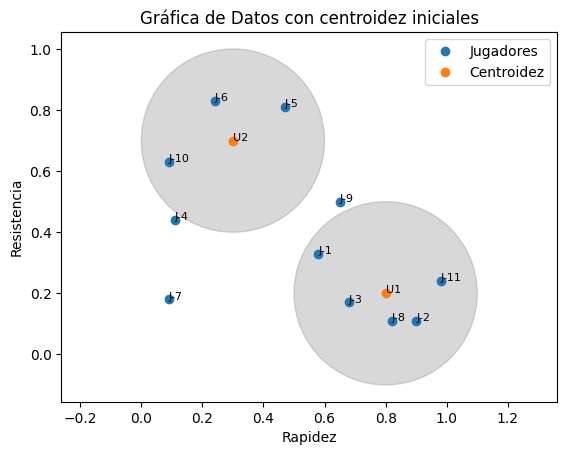

In [356]:
#Graficamos la data inicial
plt.plot(data[:,0],data[:,1],'o', label = 'Jugadores')
plt.plot(clusters[:,0],clusters[:,1], 'o', label = 'Centroidez')

shading_radius = 0.3  # Puedes ajustar este valor según tu preferencia
for cluster in clusters:
    circle = plt.Circle((cluster[0], cluster[1]), shading_radius, color='gray', alpha=0.3, fill=True)
    plt.gca().add_patch(circle)

for i, txt in enumerate(data):
    plt.annotate(f'J-{i+1}', (data[i, 0], data[i, 1]), fontsize=8)

for i, txt in enumerate(clusters):
    plt.annotate(f'U{i+1}', (clusters[i, 0], clusters[i, 1]), fontsize=8)

plt.xlabel('Rapidez')
plt.ylabel('Resistencia')
plt.legend()
plt.axis('equal')
plt.title('Gráfica de Datos con centroidez iniciales')
plt.show()

In [357]:
# 2. Calcular los grados de membresía

def calcularGradoMembresia(clusters, data):
  num_clusters = clusters.shape[0]
  num_data_points = data.shape[0]
  for i in range(1):
    for j in range(data.shape[0]):
      distancia1 = np.square(data[j,0] - clusters[i,0]) + np.square(data[j,1] - clusters[i,1])
      distancia2 = np.square(data[j,0] - clusters[i+1,0]) + np.square(data[j,1] - clusters[i+1,1])

      distancia_u1 = round(1 / ((distancia1 / distancia1) + (distancia1 / distancia2)), 4) #Distancia al centroide 1 (Rapidez)
      distancia_u2 = round(1 / ((distancia2 / distancia1) + (distancia2 / distancia2)), 4) #Distancia al centroide 2 (Resistencia)

      #Ingresamos valores en la matriz de pertenencia (cada fila corresponde a cada jugador), j es cada uno de los jugadores
      matriz_pertenencia[j,i] = distancia_u1 #Pertenencia al cluster 1 para el jugador j
      matriz_pertenencia[j,i+1] = distancia_u2 #Pertenencia al cluster 2 para el jugador j

  # print('matriz_pertenencia: \n', matriz_pertenencia)
  return matriz_pertenencia

In [358]:
#Actualizar los valores de u1 y u2

def actualizarCentroides(matriz_pertenencia, clusters, data):
  nuevoCluster = np.zeros((clusters.shape))
  membresia_square = np.square(matriz_pertenencia) #Elevamos toda la matriz_pertenencia al cuadrado

  for i in range (2):
    num = sum(np.multiply(np.reshape(membresia_square[:,i],(len(membresia_square),1)),data)) #Se calcula el numerador
    den = np.sum(np.reshape(membresia_square[:,i], (len(membresia_square),1))) #Se calcula el denominador
    nuevoCluster[i] = num / den

  return nuevoCluster

In [359]:
#Calcular Cost (J)
def cost(cantidad_clusters, clusters, matriz_pertenencia, data):
  cost = 0

  for i in range(data.shape[0]):
      for j in range(cantidad_clusters):
          pertenencia_ij = matriz_pertenencia[i, j]
          distancia = np.linalg.norm(data[i] - clusters[j])  # np.linalg.norm permite realizar la formula de calculo de distancia entre 2 coordenadas
          cost += np.multiply(np.square(pertenencia_ij), np.square(distancia)) # Realizamos la sumatoria

  return cost

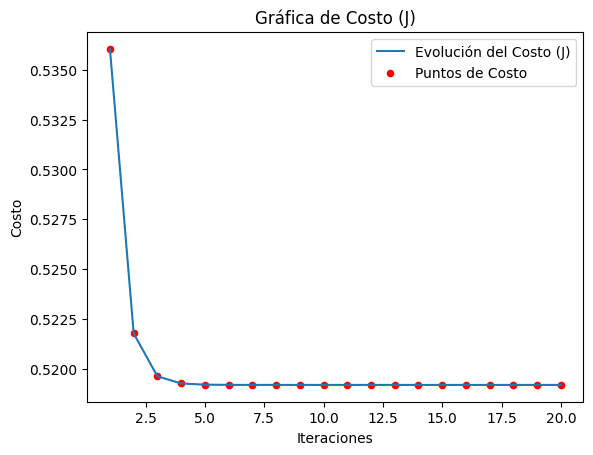

In [360]:
#Llamado de las funciones

numIter = 20
cantidad_clusters = len(clusters)
matriz_cost = np.zeros((numIter,1))
matriz_iteraciones = np.zeros((numIter,1))
matriz_pertenencia = np.zeros((data.shape[0], data.shape[1]))

for i in range(numIter):
  matriz_pertenencia = calcularGradoMembresia(clusters, data)
  clusters = actualizarCentroides(matriz_pertenencia, clusters, data)
  matriz_cost[i] = cost(cantidad_clusters, clusters, matriz_pertenencia, data)
  matriz_iteraciones[i] = i + 1;
# print(matriz_cost)

#Graficar el cost
plt.xlabel('Iteraciones')
plt.ylabel('Costo')
plt.title('Gráfica de Costo (J)')

# Grafica la evolución del costo usando una línea continua
plt.plot(matriz_iteraciones, matriz_cost, '-', label='Evolución del Costo (J)')

# Grafica los puntos de interés
plt.scatter(matriz_iteraciones, matriz_cost, c='red', marker='o', s=20, label='Puntos de Costo')

plt.legend()  # Muestra la leyenda que incluye las etiquetas

plt.show()

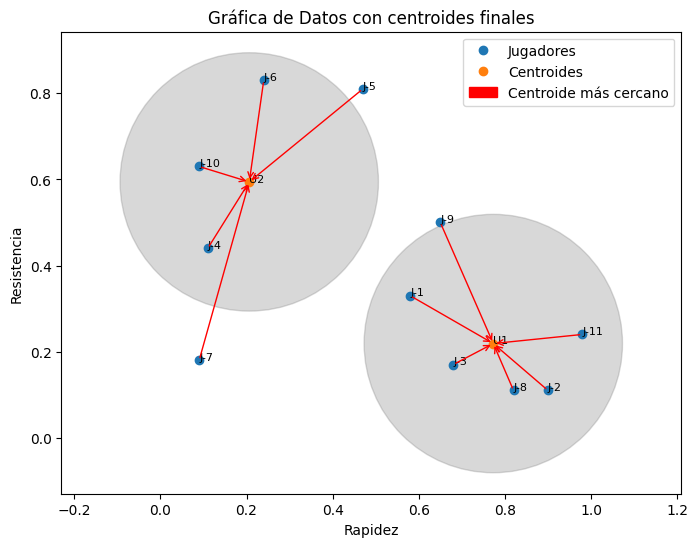

In [361]:
# Calcula los centroides más cercanos para cada punto
closest_centroids = np.argmin(np.linalg.norm(data[:, np.newaxis, :] - clusters, axis=2), axis=1)

fig, ax = plt.subplots(figsize=(8, 6))

# Grafica los datos y centroides
jugadores_plot = plt.plot(data[:, 0], data[:, 1], 'o', label='Jugadores')
centroides_plot = plt.plot(clusters[:, 0], clusters[:, 1], 'o', label='Centroides')

shading_radius = 0.3
for cluster in clusters:
    circle = plt.Circle((cluster[0], cluster[1]), shading_radius, color='gray', alpha=0.3, fill=True)
    plt.gca().add_patch(circle)

for i, txt in enumerate(data):
    plt.annotate(f'J-{i+1}', (data[i, 0], data[i, 1]), fontsize=8)

for i, txt in enumerate(clusters):
    plt.annotate(f'U{i+1}', (clusters[i, 0], clusters[i, 1]), fontsize=8)

# Dibuja flechas desde puntos a centroides más cercanos
for i, point in enumerate(data):
    closest_centroid = clusters[closest_centroids[i]]
    arrow_properties = dict(arrowstyle='->', color='red')
    plt.annotate('', closest_centroid, point, arrowprops=arrow_properties)

# Crea objetos ficticios para las flechas en la leyenda
flecha_roja = mpatches.FancyArrow(0, 0, 1, 0, color='red', label='Flechas')

# Agrega las etiquetas de Jugadores y Centroides a la leyenda
handles, labels = plt.gca().get_legend_handles_labels()
handles.append(flecha_roja)
labels.append('Centroide más cercano')

# Muestra la leyenda con las etiquetas y las flechas
plt.legend(handles, labels)

plt.xlabel('Rapidez')
plt.ylabel('Resistencia')
plt.axis('equal')
plt.title('Gráfica de Datos con centroides finales')
plt.show()
